In [2]:
from datetime import datetime
from elasticsearch import Elasticsearch
from pandas import DataFrame, Series
import pandas as pd
from pandasticsearch import Select

In [3]:
es = Elasticsearch(['localhost:9212'])

In [4]:
res = es.search(index='user_live_updated', doc_type = 'tweet', body = {
            "query": {
                "range": {
                    "created_at": {
                      
                        "gte": "now-3d"
                      
                    }
                }
            },
            "aggs": {
                "days": {
                    "date_histogram": {
                        "field": "created_at",
                        "interval": "hour"
                    }
                }
            },
            "size": 0})
            
print (res)

{'took': 22, 'timed_out': False, '_shards': {'total': 5, 'successful': 5, 'failed': 0}, 'hits': {'total': 214736, 'max_score': 0.0, 'hits': []}, 'aggregations': {'days': {'buckets': [{'key_as_string': 'Sun Jul 23 17:00:00 +0000 2017', 'key': 1500829200000, 'doc_count': 2}, {'key_as_string': 'Sun Jul 23 18:00:00 +0000 2017', 'key': 1500832800000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 19:00:00 +0000 2017', 'key': 1500836400000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 20:00:00 +0000 2017', 'key': 1500840000000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 21:00:00 +0000 2017', 'key': 1500843600000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 22:00:00 +0000 2017', 'key': 1500847200000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 23:00:00 +0000 2017', 'key': 1500850800000, 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 00:00:00 +0000 2017', 'key': 1500854400000, 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 01:00:00 +0000 2017', 'key': 1500858000000, 'doc_count': 0}

In [5]:
buckets = (res['aggregations']['days']['buckets'])
print(buckets)


[{'key_as_string': 'Sun Jul 23 17:00:00 +0000 2017', 'key': 1500829200000, 'doc_count': 2}, {'key_as_string': 'Sun Jul 23 18:00:00 +0000 2017', 'key': 1500832800000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 19:00:00 +0000 2017', 'key': 1500836400000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 20:00:00 +0000 2017', 'key': 1500840000000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 21:00:00 +0000 2017', 'key': 1500843600000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 22:00:00 +0000 2017', 'key': 1500847200000, 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 23:00:00 +0000 2017', 'key': 1500850800000, 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 00:00:00 +0000 2017', 'key': 1500854400000, 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 01:00:00 +0000 2017', 'key': 1500858000000, 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 02:00:00 +0000 2017', 'key': 1500861600000, 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 03:00:00 +0000 2017', 'key': 1500865200000, 'doc_count': 0}

In [6]:
for element in buckets: 
        del element['key'] 

print (buckets)

[{'key_as_string': 'Sun Jul 23 17:00:00 +0000 2017', 'doc_count': 2}, {'key_as_string': 'Sun Jul 23 18:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 19:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 20:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 21:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 22:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Sun Jul 23 23:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 00:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 01:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 02:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 03:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Mon Jul 24 04:00:00 +0000 2017', 'doc_count': 4227}, {'key_as_string': 'Mon Jul 24 05:00:00 +0000 2017', 'doc_count': 13696}, {'key_as_string': 'Mon Jul 24 06:00:00 +0000 2017', 'doc_count': 13708}, {'key_as_string': 'Mon

In [7]:
df = pd.DataFrame(buckets,columns=['key_as_string', 'doc_count'])
df.columns = ['date', 'doc_count']

print(df)
print(df.index.name)

                              date  doc_count
0   Sun Jul 23 17:00:00 +0000 2017          2
1   Sun Jul 23 18:00:00 +0000 2017          0
2   Sun Jul 23 19:00:00 +0000 2017          0
3   Sun Jul 23 20:00:00 +0000 2017          0
4   Sun Jul 23 21:00:00 +0000 2017          0
5   Sun Jul 23 22:00:00 +0000 2017          0
6   Sun Jul 23 23:00:00 +0000 2017          0
7   Mon Jul 24 00:00:00 +0000 2017          0
8   Mon Jul 24 01:00:00 +0000 2017          0
9   Mon Jul 24 02:00:00 +0000 2017          0
10  Mon Jul 24 03:00:00 +0000 2017          0
11  Mon Jul 24 04:00:00 +0000 2017       4227
12  Mon Jul 24 05:00:00 +0000 2017      13696
13  Mon Jul 24 06:00:00 +0000 2017      13708
14  Mon Jul 24 07:00:00 +0000 2017       9033
15  Mon Jul 24 08:00:00 +0000 2017      10496
16  Mon Jul 24 09:00:00 +0000 2017       9697
17  Mon Jul 24 10:00:00 +0000 2017       6812
18  Mon Jul 24 11:00:00 +0000 2017       2802
19  Mon Jul 24 12:00:00 +0000 2017          0
20  Mon Jul 24 13:00:00 +0000 2017

In [8]:
res2 = es.search(index='live_updated', doc_type = 'tweet', body = {
            "query": {
                "range": {
                    "created_at": {
                      
                        "gte": "now-3d"
                      
                    }
                }
            },
            "aggs": {
                "days": {
                    "date_histogram": {
                        "field": "created_at",
                        "interval": "hour"
                    }
                }
            },
            "size": 0})
            
print (res2)

{'took': 2, 'timed_out': False, '_shards': {'total': 5, 'successful': 5, 'failed': 0}, 'hits': {'total': 7438, 'max_score': 0.0, 'hits': []}, 'aggregations': {'days': {'buckets': [{'key_as_string': 'Sun Jul 23 14:00:00 +0000 2017', 'key': 1500818400000, 'doc_count': 18}, {'key_as_string': 'Sun Jul 23 15:00:00 +0000 2017', 'key': 1500822000000, 'doc_count': 104}, {'key_as_string': 'Sun Jul 23 16:00:00 +0000 2017', 'key': 1500825600000, 'doc_count': 153}, {'key_as_string': 'Sun Jul 23 17:00:00 +0000 2017', 'key': 1500829200000, 'doc_count': 182}, {'key_as_string': 'Sun Jul 23 18:00:00 +0000 2017', 'key': 1500832800000, 'doc_count': 154}, {'key_as_string': 'Sun Jul 23 19:00:00 +0000 2017', 'key': 1500836400000, 'doc_count': 121}, {'key_as_string': 'Sun Jul 23 20:00:00 +0000 2017', 'key': 1500840000000, 'doc_count': 174}, {'key_as_string': 'Sun Jul 23 21:00:00 +0000 2017', 'key': 1500843600000, 'doc_count': 161}, {'key_as_string': 'Sun Jul 23 22:00:00 +0000 2017', 'key': 1500847200000, 'do

In [9]:
buckets2 = (res2['aggregations']['days']['buckets'])
print(buckets2)

[{'key_as_string': 'Sun Jul 23 14:00:00 +0000 2017', 'key': 1500818400000, 'doc_count': 18}, {'key_as_string': 'Sun Jul 23 15:00:00 +0000 2017', 'key': 1500822000000, 'doc_count': 104}, {'key_as_string': 'Sun Jul 23 16:00:00 +0000 2017', 'key': 1500825600000, 'doc_count': 153}, {'key_as_string': 'Sun Jul 23 17:00:00 +0000 2017', 'key': 1500829200000, 'doc_count': 182}, {'key_as_string': 'Sun Jul 23 18:00:00 +0000 2017', 'key': 1500832800000, 'doc_count': 154}, {'key_as_string': 'Sun Jul 23 19:00:00 +0000 2017', 'key': 1500836400000, 'doc_count': 121}, {'key_as_string': 'Sun Jul 23 20:00:00 +0000 2017', 'key': 1500840000000, 'doc_count': 174}, {'key_as_string': 'Sun Jul 23 21:00:00 +0000 2017', 'key': 1500843600000, 'doc_count': 161}, {'key_as_string': 'Sun Jul 23 22:00:00 +0000 2017', 'key': 1500847200000, 'doc_count': 228}, {'key_as_string': 'Sun Jul 23 23:00:00 +0000 2017', 'key': 1500850800000, 'doc_count': 89}, {'key_as_string': 'Mon Jul 24 00:00:00 +0000 2017', 'key': 150085440000

In [10]:
for element in buckets2: 
        del element['key'] 

print (buckets2)

[{'key_as_string': 'Sun Jul 23 14:00:00 +0000 2017', 'doc_count': 18}, {'key_as_string': 'Sun Jul 23 15:00:00 +0000 2017', 'doc_count': 104}, {'key_as_string': 'Sun Jul 23 16:00:00 +0000 2017', 'doc_count': 153}, {'key_as_string': 'Sun Jul 23 17:00:00 +0000 2017', 'doc_count': 182}, {'key_as_string': 'Sun Jul 23 18:00:00 +0000 2017', 'doc_count': 154}, {'key_as_string': 'Sun Jul 23 19:00:00 +0000 2017', 'doc_count': 121}, {'key_as_string': 'Sun Jul 23 20:00:00 +0000 2017', 'doc_count': 174}, {'key_as_string': 'Sun Jul 23 21:00:00 +0000 2017', 'doc_count': 161}, {'key_as_string': 'Sun Jul 23 22:00:00 +0000 2017', 'doc_count': 228}, {'key_as_string': 'Sun Jul 23 23:00:00 +0000 2017', 'doc_count': 89}, {'key_as_string': 'Mon Jul 24 00:00:00 +0000 2017', 'doc_count': 73}, {'key_as_string': 'Mon Jul 24 01:00:00 +0000 2017', 'doc_count': 81}, {'key_as_string': 'Mon Jul 24 02:00:00 +0000 2017', 'doc_count': 80}, {'key_as_string': 'Mon Jul 24 03:00:00 +0000 2017', 'doc_count': 43}, {'key_as_st

In [11]:
df2 = pd.DataFrame(buckets2,columns=['key_as_string', 'doc_count'])
df2.columns = ['date', 'doc_count']
print(df2)

                              date  doc_count
0   Sun Jul 23 14:00:00 +0000 2017         18
1   Sun Jul 23 15:00:00 +0000 2017        104
2   Sun Jul 23 16:00:00 +0000 2017        153
3   Sun Jul 23 17:00:00 +0000 2017        182
4   Sun Jul 23 18:00:00 +0000 2017        154
5   Sun Jul 23 19:00:00 +0000 2017        121
6   Sun Jul 23 20:00:00 +0000 2017        174
7   Sun Jul 23 21:00:00 +0000 2017        161
8   Sun Jul 23 22:00:00 +0000 2017        228
9   Sun Jul 23 23:00:00 +0000 2017         89
10  Mon Jul 24 00:00:00 +0000 2017         73
11  Mon Jul 24 01:00:00 +0000 2017         81
12  Mon Jul 24 02:00:00 +0000 2017         80
13  Mon Jul 24 03:00:00 +0000 2017         43
14  Mon Jul 24 04:00:00 +0000 2017         42
15  Mon Jul 24 05:00:00 +0000 2017         61
16  Mon Jul 24 06:00:00 +0000 2017         46
17  Mon Jul 24 07:00:00 +0000 2017         55
18  Mon Jul 24 08:00:00 +0000 2017         64
19  Mon Jul 24 09:00:00 +0000 2017         54
20  Mon Jul 24 10:00:00 +0000 2017

In [12]:
df3 = df.merge(df2, on='date')

In [13]:
df3.columns = ['date', 'doc_count_bot', 'doc_count_human']

In [14]:
df3

,date,doc_count_bot,doc_count_human
0,Sun Jul 23 17:00:00 +0000 2017,2,182
1,Sun Jul 23 18:00:00 +0000 2017,0,154
2,Sun Jul 23 19:00:00 +0000 2017,0,121
3,Sun Jul 23 20:00:00 +0000 2017,0,174
4,Sun Jul 23 21:00:00 +0000 2017,0,161
5,Sun Jul 23 22:00:00 +0000 2017,0,228
6,Sun Jul 23 23:00:00 +0000 2017,0,89
7,Mon Jul 24 00:00:00 +0000 2017,0,73
8,Mon Jul 24 01:00:00 +0000 2017,0,81
9,Mon Jul 24 02:00:00 +0000 2017,0,80


In [15]:
df3['total_tweets'] = df3['doc_count_bot'] + df3['doc_count_human']

In [16]:
df3

,date,doc_count_bot,doc_count_human,total_tweets
0,Sun Jul 23 17:00:00 +0000 2017,2,182,184
1,Sun Jul 23 18:00:00 +0000 2017,0,154,154
2,Sun Jul 23 19:00:00 +0000 2017,0,121,121
3,Sun Jul 23 20:00:00 +0000 2017,0,174,174
4,Sun Jul 23 21:00:00 +0000 2017,0,161,161
5,Sun Jul 23 22:00:00 +0000 2017,0,228,228
6,Sun Jul 23 23:00:00 +0000 2017,0,89,89
7,Mon Jul 24 00:00:00 +0000 2017,0,73,73
8,Mon Jul 24 01:00:00 +0000 2017,0,81,81
9,Mon Jul 24 02:00:00 +0000 2017,0,80,80


In [17]:
df3['percent_bot'] = (df3['doc_count_bot']/df3['total_tweets']) * 100
pd.options.display.float_format = '{:,.2f}'.format
df3['percent_human'] = (df3['doc_count_human']/df3['total_tweets']) * 100

df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human
0,Sun Jul 23 17:00:00 +0000 2017,2,182,184,1.09,98.91
1,Sun Jul 23 18:00:00 +0000 2017,0,154,154,0.00,100.00
2,Sun Jul 23 19:00:00 +0000 2017,0,121,121,0.00,100.00
3,Sun Jul 23 20:00:00 +0000 2017,0,174,174,0.00,100.00
4,Sun Jul 23 21:00:00 +0000 2017,0,161,161,0.00,100.00
5,Sun Jul 23 22:00:00 +0000 2017,0,228,228,0.00,100.00
6,Sun Jul 23 23:00:00 +0000 2017,0,89,89,0.00,100.00
7,Mon Jul 24 00:00:00 +0000 2017,0,73,73,0.00,100.00
8,Mon Jul 24 01:00:00 +0000 2017,0,81,81,0.00,100.00
9,Mon Jul 24 02:00:00 +0000 2017,0,80,80,0.00,100.00


In [18]:
df3['date'] = pd.to_datetime(df3['date'])

In [29]:
timeHour = df3['date'].dt.hour
timeMinute = df3['date'].dt.minute
print(timeHour + timeMinute)

0     17
1     18
2     19
3     20
4     21
5     22
6     23
7      0
8      1
9      2
10     3
11     4
12     5
13     6
14     7
15     8
16     9
17    10
18    11
19    12
20    13
21    14
22    15
23    16
24    17
25    18
26    19
27    20
28    21
29    22
      ..
37     6
38     7
39     8
40     9
41    10
42    11
43    12
44    13
45    14
46    15
47    16
48    17
49    18
50    19
51    20
52    21
53    22
54    23
55     0
56     1
57     2
58     3
59     4
60     5
61     6
62     7
63     8
64     9
65    10
66    11
Name: date, dtype: int64


In [20]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

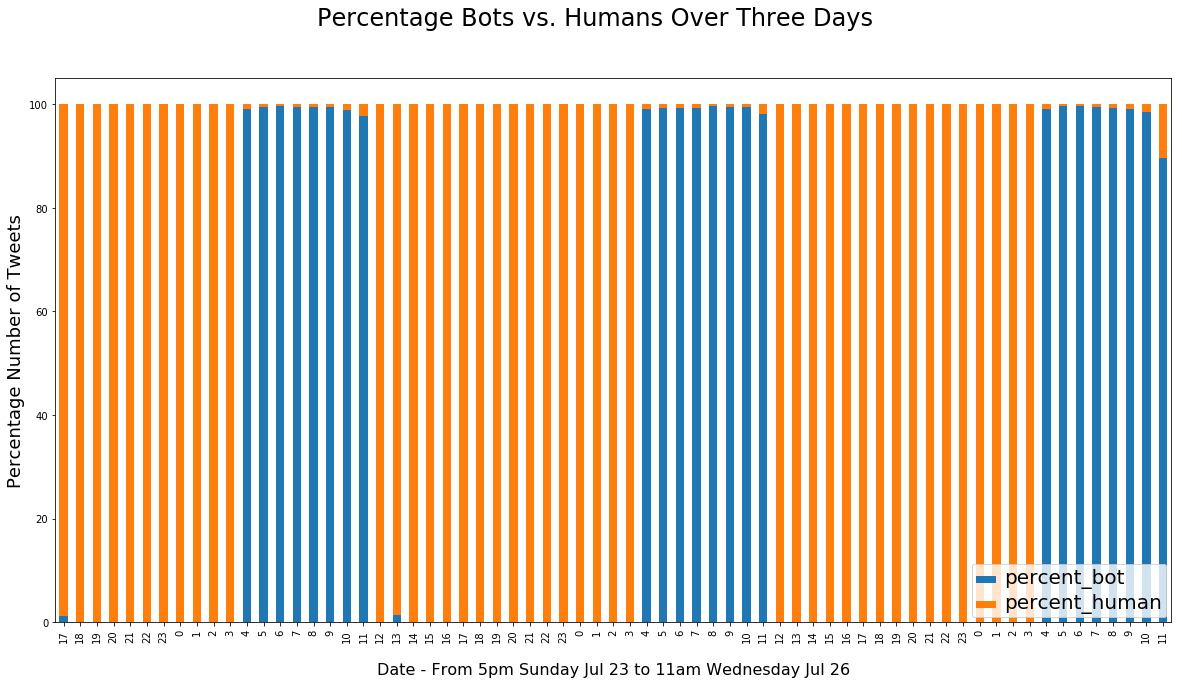

In [38]:
plt.figure();
df3.plot(x=df3['date'].dt.hour, y=["percent_bot", "percent_human"],stacked=True, kind="bar",figsize=(20,10))
plt.xlabel('Date - From 5pm Sunday Jul 23 to 11am Wednesday Jul 26', fontsize = 16, labelpad=20)
plt.ylabel('Percentage Number of Tweets', fontsize='18')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='20') #legend 'list' fontsize
plt.suptitle('Percentage Bots vs. Humans Over Three Days', fontsize='24')

